In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
path = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv'
df = pd.read_csv(path)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4177, 9)

From the above observations we can say that there are 4177 rows and 9 columns in this dataset and it is a supervised regression problem

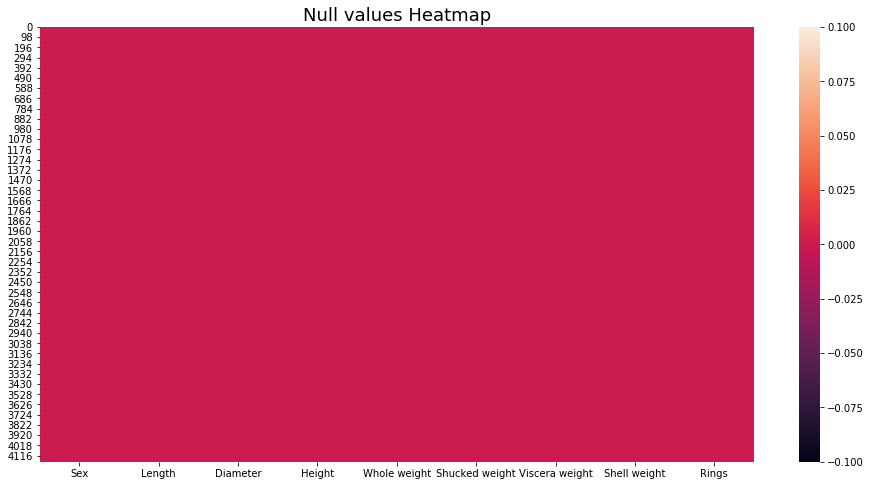

In [4]:
## Visulaization of null values
plt.figure(figsize=(16,8))
plt.title('Null values Heatmap',fontsize=18)
sns.heatmap(df.isnull())

In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

From the above observation we can say that there are zero null values in our dataset

In [6]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


From the above observation we can say that there is one object, one integer and 7 float datatypes in our dataset.

In [8]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


From the above observation we can say that the mean and median is almost same in all the columns and difference between the 75% and max is higher in height, whole weight, shucked weight and shell weight, which determines that there is outliers in the dataset.

In [9]:
columns = df.columns
collist = columns[1:-1]
collist

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

# Univariate Analysis

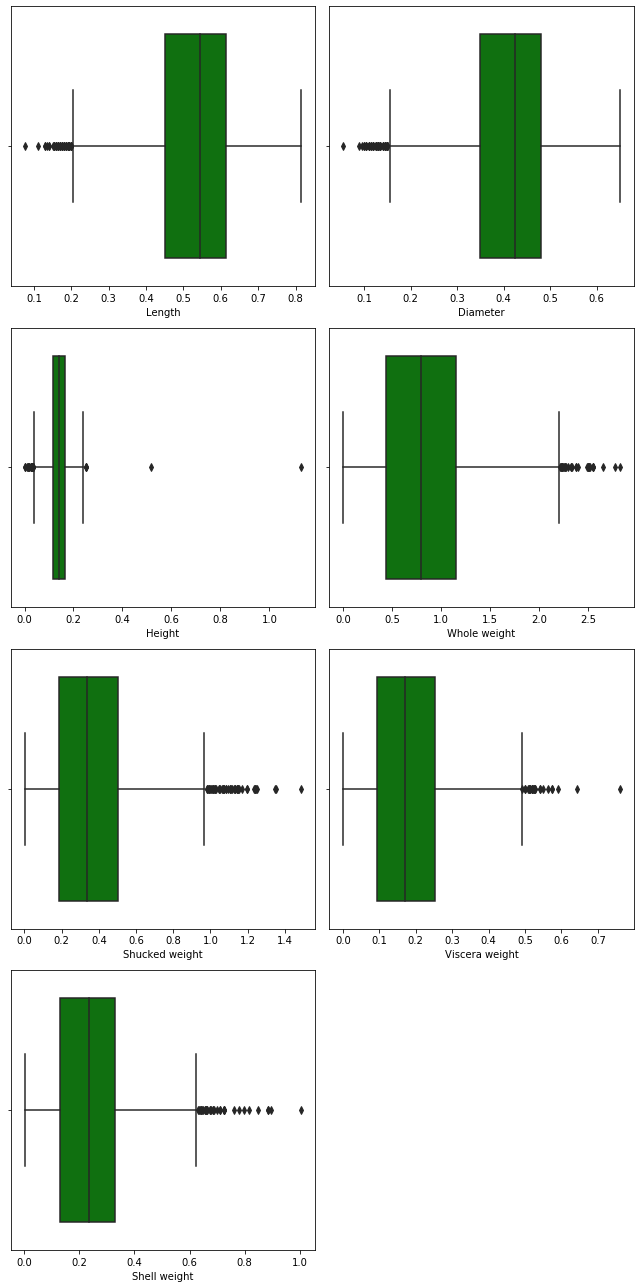

In [10]:
plt.figure(figsize = (9, 18))
for i in range(0, len(collist)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(df[collist[i]], color = 'green')
    plt.tight_layout()

From the above observation we can say that there are many outliers in almost all the columns which needs to be treated through zscore or IQR method and select whichever loses less data.

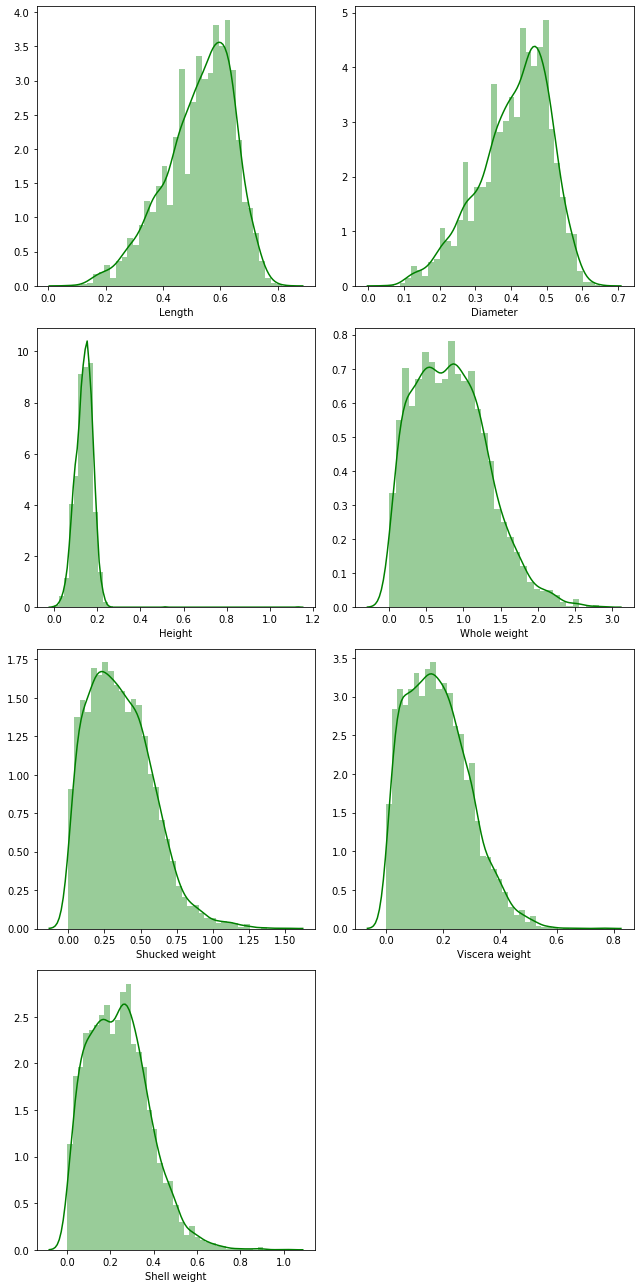

In [11]:
plt.figure(figsize = (9, 18))
for i in range(0, len(collist)):
    plt.subplot(4, 2, i+1)
    sns.distplot(df[collist[i]], color = 'green')
    plt.tight_layout()

From the above observation we can say that the columns whole weight, shucked weight, voscera weight and shell weight are right skewed. It needed to be treated after the removal of outliers.

# Bivariate Analysis

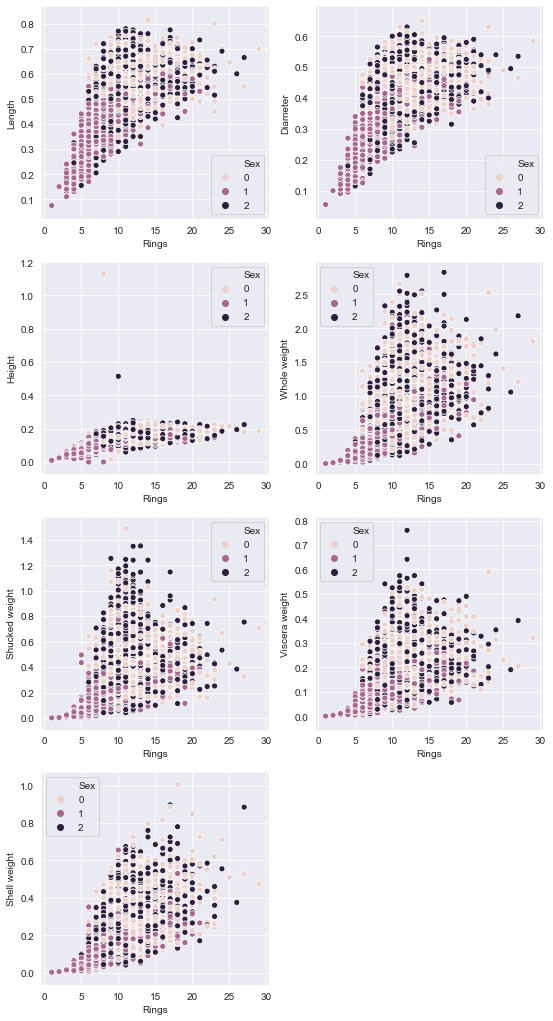

In [38]:
plt.figure(figsize = (9, 18))
sns.set_style('darkgrid')
for i in range(0, len(collist)):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(data = df, x = 'Rings', hue = 'Sex', y = collist[i] )

From the above observation we can say that all the columns except height column is very much positively correlated with the target column and also in hiegt there are very high outliers present.

# Multivariate Analysis

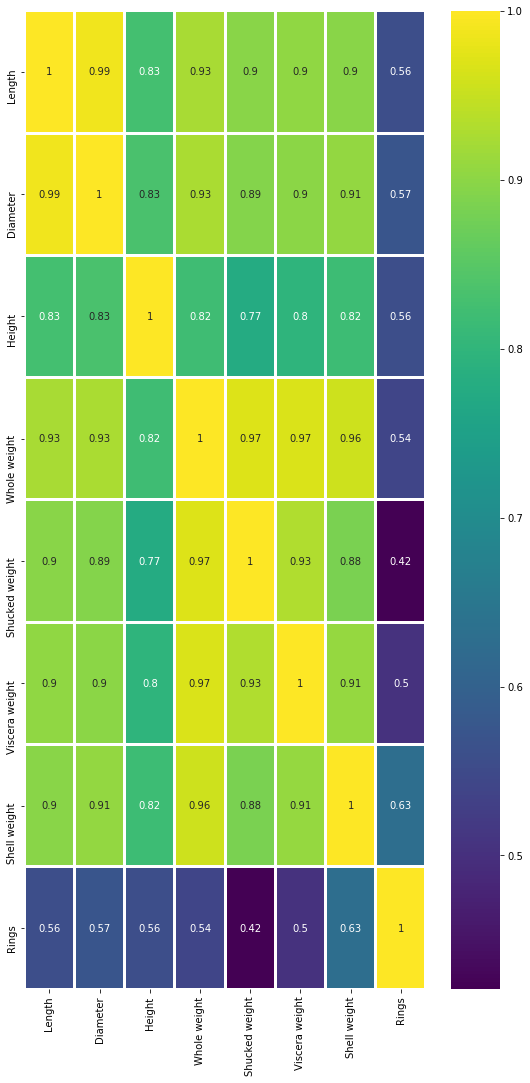

In [13]:
plt.figure(figsize = (9, 18))
sns.heatmap(df.corr(), annot = True, linewidths = 2, cmap = 'viridis')

From the above observation we can say that in all columns there is high correlation between the target column Rings.

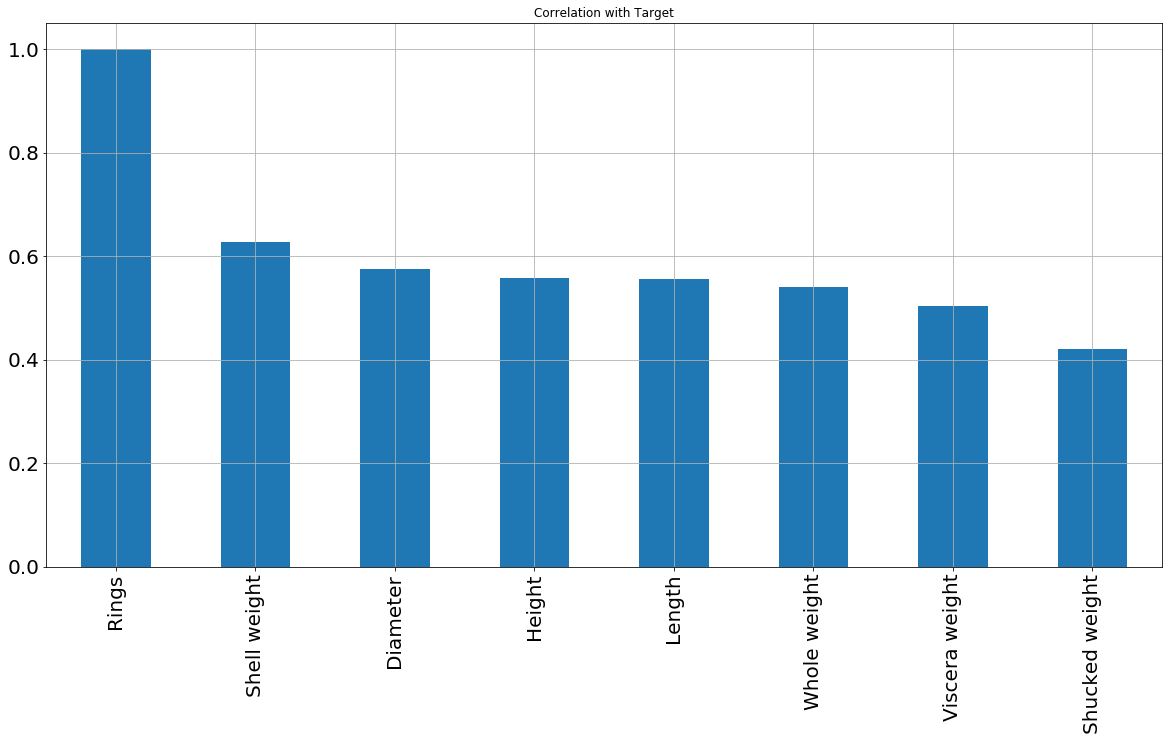

In [14]:
## Plotting the Correlation with Target.
df.corr()['Rings'].sort_values(ascending=False).plot.bar(figsize=(20,10),grid=True,title='Correlation with Target',fontsize=20)

From the above observation we can say that the columns are moderately correlated with the target column. We can't drop any column as all columns show some correlation with the target column and also we cannot lose any data.

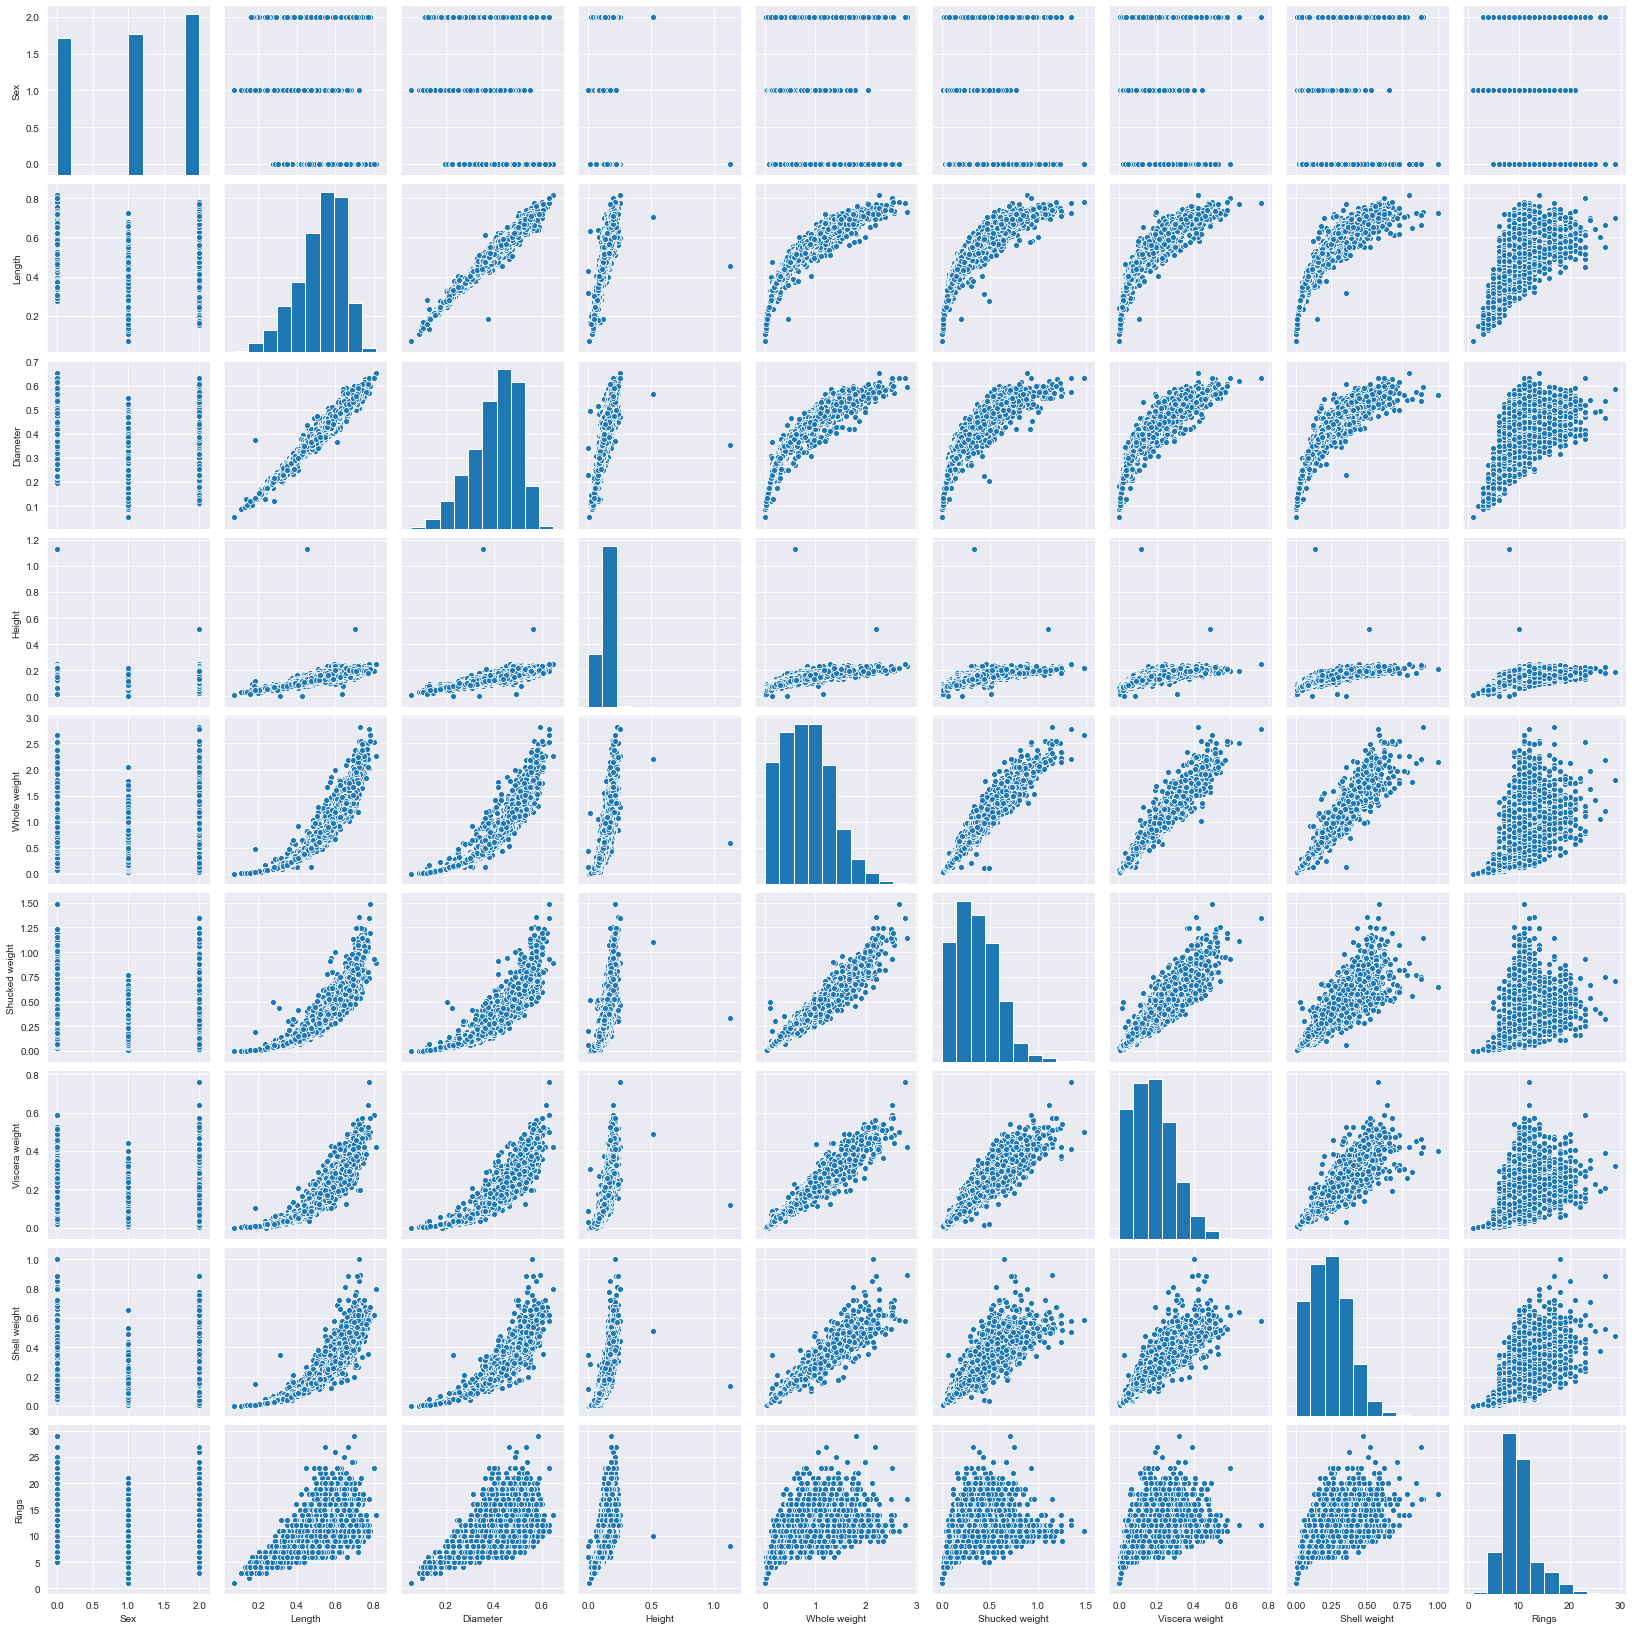

In [39]:
sns.pairplot(df)

1-The above pairplot shows a linear relation between between differnt attributes with each other.

2-We can spot some outliers in our dataset also.

3- The distribution is a little right skewed but it is near to Normal Distribution.

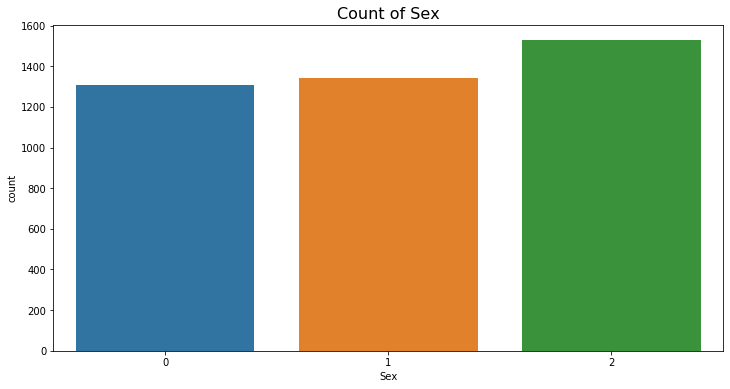

In [35]:
plt.figure(figsize=(12,6))
plt.title('Count of Sex',fontsize=16)
sns.countplot(df['Sex'])

# Data Cleaning

In [15]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Sex'] = lb.fit_transform(df['Sex'])

In [16]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df_new = df[(z<3).all(axis = 1)]

In [17]:
print('Shape before and after')
print('Shape before'.ljust(20), ':', df.shape)
print('Shape after'.ljust(20), ':', df_new.shape)
print('Percentage Loss'.ljust(20), ':', ((df.shape[0] - df_new.shape[0])/df.shape[0])*100, '%')

Shape before and after
Shape before         : (4177, 9)
Shape after          : (4027, 9)
Percentage Loss      : 3.5910940866650707 %


In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_new2 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [19]:
print('Shape before and after')
print('Shape before'.ljust(20), ':', df.shape)
print('Shape after'.ljust(20), ':', df_new2.shape)
print('Percentage Loss'.ljust(20), ':', ((df.shape[0] - df_new2.shape[0])/df.shape[0])*100, '%')

Shape before and after
Shape before         : (4177, 9)
Shape after          : (3781, 9)
Percentage Loss      : 9.480488388795786 %


From the above observation we can say that the zscore method has removed the outliers with less loss of data which is only 3.59%, hence we will select the zscore method to remove the outliers.

In [20]:
df_new.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

In [21]:
df_new2 = df_new.copy()

In [22]:
df_new2['Length'] = np.sqrt(df_new2['Length'])
df_new2['Diameter'] = np.sqrt(df_new2['Diameter'])

In [23]:
df_new2.skew()

Sex              -0.094886
Length           -0.939551
Diameter         -0.927224
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

The acceptable range for the skewness is between -0.5 to 0.5. Here we can see that Length and Diameter are little bit left skewed. Here the value - 0.62 and -0.59 is still a acceptable range as by applying other transformation technique will further increase the skewness so we will keep it as it is.

# Splitting Data into input and output variable

In [24]:
X = df_new.drop('Rings', axis = 1).values
y = df_new['Rings'].values

In [25]:
X.shape

(4027, 8)

In [26]:
y.shape

(4027,)

# Getting the best Random State

In [27]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

maxAccu = 0
maxRS = 0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    pred = LR.predict(X_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best Accuracy is', maxAccu, 'on Random state:', maxRS)

Best Accuracy is 0.5622152819326816 on Random state: 82


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=82)

In [29]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [30]:
def model_algo (clf ,X_train, y_train):
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    r2_scr = r2_score(pred, y_test)
    print("r2_core: ", r2_scr)
    print("\n")
    print("Train Accuracy :",clf.score(X_train, y_train))
    print("Test Accuracy :",clf.score(X_test, y_test))
    print("\n")
    print('Mean absolute error :',mean_absolute_error(pred,y_test))
    print('\n')
    print('Mean squared error :',mean_squared_error(pred,y_test))
    print('\n')
    print("Root Mean squared error", np.sqrt(mean_squared_error(pred,y_test)))   

In [31]:
# Creating the Instances for the Algorithms
LR  = LinearRegression()
SVR = SVR()
DT  = DecisionTreeRegressor()
RF  = RandomForestRegressor()

In [32]:
models=[]
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DT))
models.append(('Suppourt vector regressor',SVR))
models.append(('RandomForestRegressor',RF))

In [33]:
#Creating a list which Holds the algorithms
for name,model in models:
    k=model
    print('-------------',name,'-------------')
    model_algo(k,X_train,y_train)
    print('\n')
    meanC = cross_val_score(k,X_train,y_train, cv=5, scoring = "r2").mean()
    print('Cross validation score :', meanC)
    stdC = cross_val_score(k,X_train,y_train, cv=5, scoring = "r2").std()
    print('Standard Deviationin :', stdC)
    print('\n')
    print('\n')

------------- LinearRegression -------------
r2_core:  0.05425248077109701


Train Accuracy : 0.49429631123796947
Test Accuracy : 0.5622152819326816


Mean absolute error : 1.4599821566846825


Mean squared error : 3.877787357757391


Root Mean squared error 1.9692098308096553


Cross validation score : 0.48889909441152435
Standard Deviationin : 0.02646200333574023




------------- DecisionTreeRegressor -------------
r2_core:  0.1573373802745065


Train Accuracy : 1.0
Test Accuracy : 0.1472858740939852


Mean absolute error : 1.9860973187686197


Mean squared error : 7.553128103277061


Root Mean squared error 2.748295490531733


Cross validation score : 0.0547939989928403
Standard Deviationin : 0.07390241330528666




------------- Suppourt vector regressor -------------
r2_core:  -0.3405959009877457


Train Accuracy : 0.4742476867369101
Test Accuracy : 0.5193349178089157


Mean absolute error : 1.44336011941811


Mean squared error : 4.257610880673519


Root Mean squared error 2.063

From the above observations we can say that the Random Forest Regressor gives the best r2_score and also the error is least. The difference between the crossvalscore is also less. So we select the RandomForest Regressor as our best model. We will further do Hyperparamter tuning to get the best result.

# Hyperparameter Tuning

In [34]:
# Hyper Hyper parameter tuning of RandomForest Classifier

param={'n_estimators':[10,50,100,500],'criterion':['mse', 'mae']}

grid=GridSearchCV(RF,param,cv=5,n_jobs=-1,scoring='r2')

grid.fit(X,y)

# Print the tuned parameters and score 
print("Tuned RandomForest Parameters: {}".format(grid.best_params_)) 
print("Best score is {}".format(grid.best_score_))

Tuned RandomForest Parameters: {'criterion': 'mse', 'n_estimators': 500}
Best score is 0.45827102284936555


In [42]:
RF = RandomForestRegressor(criterion = 'mse', n_estimators=500)
RF.fit(X_train, y_train)
pred = RF.predict(X_test)
print('Error')
print(' Mean Absolute Error (MAE) :',mean_absolute_error(pred,y_test))
print('Mean Squared Error (MSE) :',mean_squared_error(pred,y_test))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(pred,y_test)))
print('R_2 score:',r2_score(pred,y_test))

Error
 Mean Absolute Error (MAE) : 1.4028659384309832
Mean Squared Error (MSE) : 3.6161598530287984
Root Mean Squared Error : 1.9016203230478996
R_2 score: 0.27714539594905174


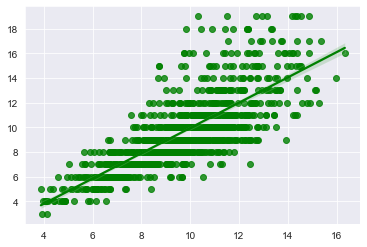

In [43]:
sns.regplot(pred,y_test,color='g')

From above observation we can see that our mean absolute error ,mean squared error and root mean squared error has decreased(improved). So we will save this as our best model

# Saving the Model


In [44]:
import joblib
joblib.dump(RF, 'AbaloneRF.pkl')

['AbaloneRF.pkl']

In [45]:
loaded_model = joblib.load('AbaloneRF.pkl')
prediction = loaded_model.predict(X_test)